**Instructions**

1- upload latest  version of dataset (olist_cleaned6.csv)

2-check its path * keep same name*


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/olist_cleaned6.csv')

## Data profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   shipping_limit_date            118310 non-null  object 
 7   order_delivered_customer_date  115722 non-null  object 
 8   order_estimated_delivery_date  119143 non-null  object 
 9   customer_unique_id             119143 non-null  object 
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  product_id                    

In [ ]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,118146.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,4.015582
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,1.400436
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,5.000000
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,5.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000


In [ ]:
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date']=pd.to_datetime(df['order_delivered_carrier_date'])
df['shipping_limit_date']=pd.to_datetime(df['shipping_limit_date'])
df['order_delivered_customer_date']=pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date']=pd.to_datetime(df['order_estimated_delivery_date'])


In [ ]:
df.isnull().sum()/len(df)

,0
order_id,0.000000
order_item_id,0.006992
order_status,0.000000
order_purchase_timestamp,0.000000
order_approved_at,0.001486
order_delivered_carrier_date,0.017508
shipping_limit_date,0.006992
order_delivered_customer_date,0.028713
order_estimated_delivery_date,0.000000
customer_unique_id,0.000000


In [ ]:
df[df['product_category_name'].isnull()]

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_id,seller_city,seller_state
8,136cce7faa42fdb2cefd53fdc79a6098,1.0,invoiced,2024-04-11 12:22:08,2024-04-13 13:25:17,NaT,2024-04-19 13:25:17,NaT,2024-05-09,36edbb3fb164b1f16485364b6fb04c73,...,49.90,16.05,1.0,credit_card,1.0,65.95,2.0,dc8798cbf453b7e0f98745e396cc5616,sao paulo,SP
129,bfe42c22ecbf90bc9f35cf591270b6a7,1.0,delivered,2025-01-27 22:04:34,2025-01-27 22:16:18,2025-02-03 03:56:00,2025-01-31 22:16:18,2025-02-09 20:16:40,2025-02-26,34c58672601f2c6d29db7efd1f6bf958,...,27.30,15.10,1.0,credit_card,1.0,42.40,5.0,e5a3438891c0bfdb9394643f95273d8e,limeira,SP
221,58ac1947c1a9067b9f416cba6d844a3f,1.0,delivered,2024-09-13 09:18:50,2024-09-13 13:45:43,2024-09-14 21:20:03,2024-09-19 13:45:43,2024-09-21 21:16:17,2024-09-25,5cbf29b2dcf212a6a5d864b887238c72,...,110.00,14.16,1.0,credit_card,5.0,124.16,5.0,520b493b57809f446cb0a233bb3e25c7,santos,SP
274,e22b71f6e4a481445ec4527cb4c405f7,1.0,delivered,2024-04-22 13:48:18,2024-04-22 14:01:13,2024-04-24 19:08:53,2024-04-27 14:01:13,2024-05-02 15:45:27,2024-05-11,1268b060098ed3f22c2e7c34cc72a1a8,...,22.50,11.74,1.0,credit_card,3.0,34.24,4.0,6cd68b3ed6d59aaa9fece558ad360c0a,belo horizonte,MG
316,a094215e786240fcfefb83d18036a1cd,1.0,delivered,2025-02-08 18:56:45,2025-02-08 19:32:18,2025-02-09 21:41:54,2025-02-14 19:10:08,2025-02-19 13:28:50,2025-02-22,f5cb81f98962f7504bef1e75579b6dff,...,122.99,9.06,1.0,credit_card,1.0,132.05,5.0,c826c40d7b19f62a09e2d7c5e7295ee2,guarulhos,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118914,aaab15da689073f8f9aa978a390a69d1,NaN,unavailable,2025-01-16 14:27:59,2025-01-17 03:37:34,NaT,NaT,NaT,2025-02-06,a33e0969408919ba06779f497ead93ec,...,NaN,NaN,1.0,boleto,1.0,210.09,1.0,NaN,NaN,NaN
118946,3a3cddda5a7c27851bd96c3313412840,NaN,canceled,2025-08-31 16:13:44,NaN,NaT,NaT,NaT,2025-10-01,e90598185d2427a35e32ef241a5c04aa,...,NaN,NaN,1.0,voucher,1.0,63.89,5.0,NaN,NaN,NaN
119039,a89abace0dcc01eeb267a9660b5ac126,NaN,canceled,2025-09-06 18:45:47,NaN,NaT,NaT,NaT,2025-09-27,d05c44a138277ad325d915c6b7ccbcdf,...,NaN,NaN,1.0,voucher,1.0,107.13,4.0,NaN,NaN,NaN
119040,a69ba794cc7deb415c3e15a0a3877e69,NaN,unavailable,2024-08-23 16:28:04,2024-08-28 15:44:47,NaT,NaT,NaT,2024-09-15,e72a90a2b29fe1a8795b284aaaa3246f,...,NaN,NaN,1.0,credit_card,2.0,195.91,1.0,NaN,NaN,NaN


In [ ]:
df[df['product_category_name'].isnull()]['product_id']
#checking if the products without categories have an ID

,product_id
8,a1804276d9941ac0733cfd409f5206eb
129,71225f49be70df4297892f6a5fa62171
221,9820e04e332fc450d6fd975befc1bc28
274,3bc5164bc7f4be77002d6651da65c98c
316,5a848e4ab52fd5445cdc07aab1c40e48
...,...
118914,NaN
118946,NaN
119039,NaN
119040,NaN


In [ ]:
df[df["order_status"]=="unavailable"].head(20)
#I saw some rows with unavailable with most of the nulls in product_category_name

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_id,seller_city,seller_state
319,8e24261a7e58791d10cb1bf9da94df5c,NaN,unavailable,2024-11-16 15:09:28,2024-11-16 15:26:57,NaT,NaT,NaT,2024-12-05,41fc647b8c6bd979b1b6364b60471b50,...,NaN,NaN,1.0,credit_card,5.0,84.00,1.0,NaN,NaN,NaN
702,c272bcd21c287498b4883c7512019702,NaN,unavailable,2025-01-31 11:31:37,2025-01-31 14:23:50,NaT,NaT,NaT,2025-02-16,0e634b16e4c585acbd7b2e8276ce6677,...,NaN,NaN,1.0,credit_card,1.0,97.68,3.0,NaN,NaN,NaN
828,37553832a3a89c9b2db59701c357ca67,NaN,unavailable,2024-08-14 17:38:02,2024-08-17 00:15:18,NaT,NaT,NaT,2024-09-05,596ed6d7a35890b3fbac54ec01f69685,...,NaN,NaN,1.0,boleto,1.0,132.46,1.0,NaN,NaN,NaN
887,d57e15fb07fd180f06ab3926b39edcd2,NaN,unavailable,2025-01-08 19:39:03,2025-01-09 07:26:08,NaT,NaT,NaT,2025-02-06,2349bbb558908e0955e98d47dacb7adb,...,NaN,NaN,1.0,boleto,1.0,134.38,1.0,NaN,NaN,NaN
1395,2f634e2cebf8c0283e7ef0989f77d217,NaN,unavailable,2024-09-27 20:55:33,2024-09-28 01:32:50,NaT,NaT,NaT,2024-10-27,21c933c8dd97d088e64c50988c90ccf5,...,NaN,NaN,1.0,credit_card,12.0,615.53,1.0,NaN,NaN,NaN
1897,ee0db22a8e742b752914016708470ec8,NaN,unavailable,2024-08-24 11:04:41,2024-08-24 11:15:11,NaT,NaT,NaT,2024-09-18,bdc67efa33dd0c3228b91714ac6e363c,...,NaN,NaN,1.0,credit_card,4.0,167.82,1.0,NaN,NaN,NaN
2180,6ad57aecbae806a7e9cc2cdb6b380711,NaN,unavailable,2024-11-30 07:48:24,2024-11-30 08:14:42,NaT,NaT,NaT,2024-12-29,45b1948a7554a397cc42c2ea55c54ab6,...,NaN,NaN,1.0,credit_card,2.0,161.47,1.0,NaN,NaN,NaN
2570,9f3458f0433d4cfa472f4682654b8d49,NaN,unavailable,2024-07-18 23:36:55,2024-07-18 23:50:17,NaT,NaT,NaT,2024-08-09,a946faf63af327d1dd0362b3fa3882a3,...,NaN,NaN,1.0,credit_card,4.0,78.18,5.0,NaN,NaN,NaN
2750,f0df036e9be21fc238f131bbfcdde769,NaN,unavailable,2024-02-24 23:39:21,2024-02-24 23:45:14,NaT,NaT,NaT,2024-04-07,61181b9bc9188678b5991d89064dd961,...,NaN,NaN,1.0,credit_card,5.0,59.74,1.0,NaN,NaN,NaN
2771,86f0bcd9b426a2c1022ae317c7f27be6,NaN,unavailable,2024-03-08 15:13:03,2024-03-08 15:13:03,NaT,NaT,NaT,2024-03-29,930c4390af58f67334447c3a1cf2ba36,...,NaN,NaN,1.0,credit_card,5.0,177.59,4.0,NaN,NaN,NaN


In [ ]:
df=df[df["order_status"]!="unavailable"]
#Droping the rows to remove any inconsistencies in the payment methods or the reviews

In [ ]:
df.duplicated(keep=False).sum()

np.int64(836)

In [ ]:
df.loc[df.duplicated(keep=False), ['order_id','product_id','order_item_id','customer_unique_id','seller_id']].head(14)

,order_id,product_id,order_item_id,customer_unique_id,seller_id
480,ac7a92560a9e99f0a0ab4988102f491b,4ab7490d3e55de79cae5fc88e1657276,1.0,a176838867d89ed62981cdf02b7ca3e1,b2479f944e1b90cf8a5de1bbfde284d6
481,ac7a92560a9e99f0a0ab4988102f491b,4ab7490d3e55de79cae5fc88e1657276,1.0,a176838867d89ed62981cdf02b7ca3e1,b2479f944e1b90cf8a5de1bbfde284d6
659,7845a2492ab1b4f2cf3d56c7b8da1446,16241e79b047426033194065d8b321b2,1.0,1175e95fb47ddff9de6b2b06188f7e0d,4830e40640734fc1c52cd21127c341d4
660,7845a2492ab1b4f2cf3d56c7b8da1446,16241e79b047426033194065d8b321b2,1.0,1175e95fb47ddff9de6b2b06188f7e0d,4830e40640734fc1c52cd21127c341d4
737,714fb133a6730ab81fa1d3c1b2007291,a0b7d5a992ccda646f2d34e418fff5a0,1.0,c4ebedb09beb89cc0314c5c0c33f8053,95f83f51203c626648c875dd41874c7f
738,714fb133a6730ab81fa1d3c1b2007291,a0b7d5a992ccda646f2d34e418fff5a0,1.0,c4ebedb09beb89cc0314c5c0c33f8053,95f83f51203c626648c875dd41874c7f
799,acbe07f22f29ad7e5a78f30008cc6ec7,c0e452663c284f3f8e578f390dc3ab21,1.0,6457b2cb5462c1217e8e6d36b0ff39d2,65a7c0788e4d632ccb5e1b594b87f0bb
800,acbe07f22f29ad7e5a78f30008cc6ec7,c0e452663c284f3f8e578f390dc3ab21,1.0,6457b2cb5462c1217e8e6d36b0ff39d2,65a7c0788e4d632ccb5e1b594b87f0bb
801,acbe07f22f29ad7e5a78f30008cc6ec7,c0a0b5aa4507363e601eb90082c9c008,2.0,6457b2cb5462c1217e8e6d36b0ff39d2,65a7c0788e4d632ccb5e1b594b87f0bb
802,acbe07f22f29ad7e5a78f30008cc6ec7,c0a0b5aa4507363e601eb90082c9c008,2.0,6457b2cb5462c1217e8e6d36b0ff39d2,65a7c0788e4d632ccb5e1b594b87f0bb


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['customer_state'].value_counts()
#Making sure there aren't any inconsistencies in the names

,count
customer_state,
SP,49773
RJ,15403
MG,13677
RS,6516
PR,5983
SC,4313
BA,4060
DF,2490
GO,2449


In [ ]:
df['payment_type'].value_counts()

,count
payment_type,
credit_card,87032
boleto,22951
voucher,6389
debit_card,1693
not_defined,3


In [ ]:
df[df['payment_type']=="not_defined"]
#checking which rows and why
#Bec. the order was canceled before any payment method was added

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_id,seller_city,seller_state
1362,00b1cb0320190ca0daa2c88b35206009,NaN,canceled,2025-08-28 15:26:39,NaN,NaT,NaT,NaT,2025-09-12,4fa4365000c7090fcb8cad5713c6d3db,...,NaN,NaN,1.0,not_defined,1.0,0.0,1.0,NaN,NaN,NaN
47855,4637ca194b6387e2d538dc89b124b0ee,NaN,canceled,2025-09-03 14:14:25,NaN,NaT,NaT,NaT,2025-09-10,968fac81e2c44fb6c1e3ac2a45e6a102,...,NaN,NaN,1.0,not_defined,1.0,0.0,3.0,NaN,NaN,NaN
48231,c8c528189310eaa44a745b8d9d26908b,NaN,canceled,2025-08-28 20:05:14,NaN,NaT,NaT,NaT,2025-09-11,6ba987d564bad1f9da8e14b9d3b71c8f,...,NaN,NaN,1.0,not_defined,1.0,0.0,1.0,NaN,NaN,NaN


In [ ]:
df['order_status'].value_counts()

,count
order_status,
delivered,115312
shipped,1251
canceled,746
invoiced,378
processing,376
created,5
approved,3


In [ ]:
df['calculated_total']=df['price']+df['freight_value']
#Adding the price of the items in the order and it's delivery

In [ ]:
fig=px.scatter(df, x='calculated_total', y='payment_value')
fig.show()
#Seeing if there is a margin between the payed value and the total due. to taxes, discounts or errors

In [ ]:
df.drop(df[df['payment_value']>10000].index, inplace=True)
#Removed a single row which has a very high diff between it's total and the payed amount

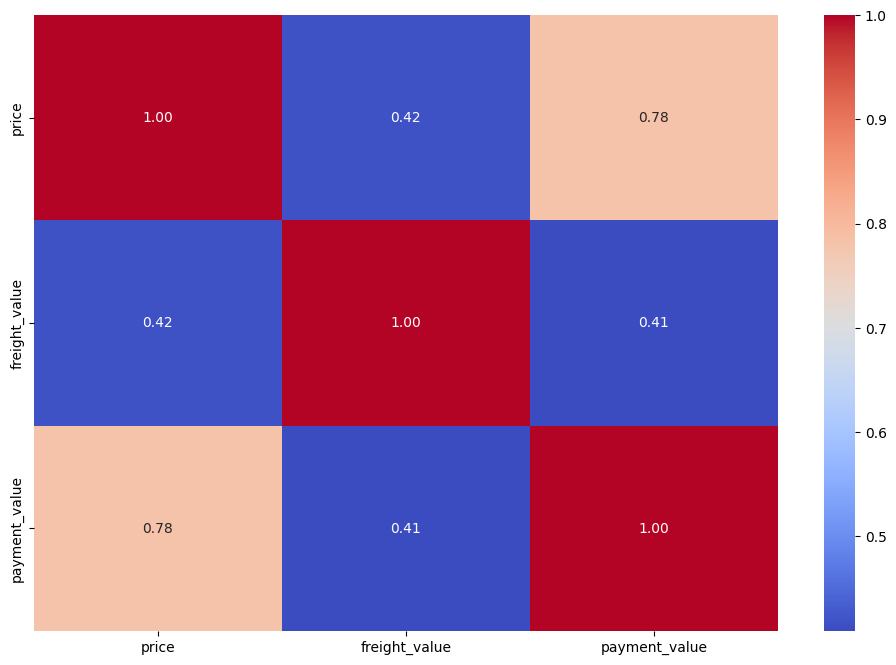

In [ ]:
cols=df[['price','freight_value','payment_value']]
corr_mat=cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
status_count=df['order_status'].value_counts().reset_index()
status_count.columns= ['order_status','count']
status_count['percentage']=(status_count['count']/len(df))*100

fig = px.bar(status_count, x='order_status', y='count', color='order_status', custom_data=['percentage'])
fig.update_traces(texttemplate='%{y}(%{customdata[0]:.1f}%)', textposition='outside')
fig.show()

## Correlations & exploring relationships

In [ ]:
df.head(5)

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,seller_id,seller_city,seller_state,calculated_total
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,delivered,2024-10-02 10:56:33,2024-10-02 11:07:15,2024-10-04 19:55:00,2024-10-06 11:07:15,2024-10-10 21:25:13,2024-10-18,7c396fd4830fd04220f754e42b4e5bff,...,8.72,1.0,credit_card,1.0,18.12,4.0,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,38.71
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,delivered,2024-10-02 10:56:33,2024-10-02 11:07:15,2024-10-04 19:55:00,2024-10-06 11:07:15,2024-10-10 21:25:13,2024-10-18,7c396fd4830fd04220f754e42b4e5bff,...,8.72,3.0,voucher,1.0,2.00,4.0,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,38.71
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,delivered,2024-10-02 10:56:33,2024-10-02 11:07:15,2024-10-04 19:55:00,2024-10-06 11:07:15,2024-10-10 21:25:13,2024-10-18,7c396fd4830fd04220f754e42b4e5bff,...,8.72,2.0,voucher,1.0,18.59,4.0,3504c0cb71d7fa48d967e0e4c94d59d9,maua,SP,38.71
3,53cdb2fc8bc7dce0b6741e2150273451,1.0,delivered,2025-07-24 20:41:37,2025-07-26 03:24:27,2025-07-26 14:31:00,2025-07-30 03:24:27,2025-08-07 15:27:45,2025-08-13,af07308b275d755c9edb36a90c618231,...,22.76,1.0,boleto,1.0,141.46,4.0,289cdb325fb7e7f891c38608bf9e0962,belo horizonte,SP,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,1.0,delivered,2025-08-08 08:38:49,2025-08-08 08:55:23,2025-08-08 13:50:00,2025-08-13 08:55:23,2025-08-17 18:06:29,2025-09-04,3a653a41f6f9fc3d2a113cf8398680e8,...,19.22,1.0,credit_card,3.0,179.12,5.0,4869f7a5dfa277a7dca6462dcf3b52b2,guariba,SP,179.12


In [ ]:
df.columns

Index(['order_id', 'order_item_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'shipping_limit_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'product_category_name', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'seller_id',
       'seller_city', 'seller_state', 'calculated_total'],
      dtype='object')

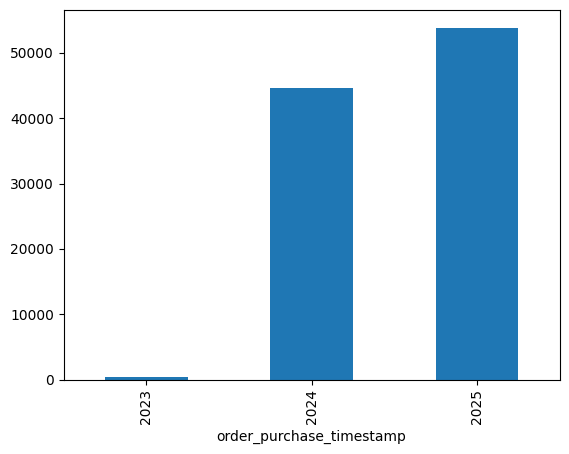

In [ ]:
# orders count over time - year
# df.groupby(df["order_approved_at"].dt.year)["order_id"].count()
df.groupby(df["order_purchase_timestamp"].dt.year)["order_id"].nunique().plot.bar()
plt.show()

In [ ]:
# orders count over time - months 2023
df[df["order_purchase_timestamp"].dt.year == 2023].groupby(df["order_purchase_timestamp"].dt.month)["order_id"].nunique()


,order_id
order_purchase_timestamp,
9,4
10,317
12,1


In [ ]:
# orders count over time - months 2024
filter_df = (
    df[df["order_purchase_timestamp"].dt.year == 2024]
    .groupby(df["order_purchase_timestamp"].dt.month)["order_id"]
    .nunique()
    .reset_index(name="order_count")
    .rename(columns={"order_purchase_timestamp": "month"})
)
fig=px.bar(filter_df,x="month", y="order_count", title="Orders Count Over Time (2024)")
fig.show()


In [ ]:
# orders count over time - months 2025
filter_df = (
    df[df["order_purchase_timestamp"].dt.year == 2025]
    .groupby(df["order_purchase_timestamp"].dt.month)["order_id"]
    .nunique()
    .reset_index(name="order_count")
    .rename(columns={"order_purchase_timestamp": "month"})
)

fig=px.bar(filter_df,x="month", y="order_count", title="Orders Count Over Time (2025)")
fig.show()

In [ ]:
# coorelation (review score - order count )
review_orders = (
    df.groupby("review_score")["order_id"]
      .nunique()
      .reset_index(name="order_count")
)
review_orders

,review_score,order_count
0,1.0,10930
1,2.0,3105
2,3.0,8125
3,4.0,19078
4,5.0,57040


In [ ]:
fig=px.pie(review_orders, names='review_score', values='order_count',hole=0.4,title="orders count by review rates")
fig.show()

In [ ]:
fig=px.bar(review_orders, x='review_score', y='order_count')
fig.show()


In [ ]:
# customer distribution among states
fig=px.histogram(df.groupby("customer_state")['customer_unique_id'].nunique().reset_index(name="total"),
                 x="customer_state",y="total")
fig.show()

In [ ]:
# payment type and total spent   *might further interpret

fig=px.histogram(df.groupby("payment_type")['payment_value'].sum().reset_index(name="total"),
                 x="payment_type",y="total")
fig.show()

In [ ]:
filter=df.groupby("product_category_name")["calculated_total"].sum().sort_values(ascending=False).head(5).reset_index()
fig=px.pie(filter,names="product_category_name", values="calculated_total", title="Top 5 Product Categories by Sales")
fig.show()

In [ ]:
#how many installments and total order value

## Data preprocessing

### Data handling

In [ ]:
# JANA & SAMA
df.isnull().sum()


,0
order_id,0
order_item_id,187
order_status,0
order_purchase_timestamp,0
order_approved_at,176
order_delivered_carrier_date,1431
shipping_limit_date,187
order_delivered_customer_date,2760
order_estimated_delivery_date,0
customer_unique_id,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118063 entries, 0 to 119142
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118063 non-null  object        
 1   order_item_id                  117876 non-null  float64       
 2   order_status                   118063 non-null  object        
 3   order_purchase_timestamp       118063 non-null  datetime64[ns]
 4   order_approved_at              117887 non-null  object        
 5   order_delivered_carrier_date   116632 non-null  datetime64[ns]
 6   shipping_limit_date            117876 non-null  datetime64[ns]
 7   order_delivered_customer_date  115303 non-null  datetime64[ns]
 8   order_estimated_delivery_date  118063 non-null  datetime64[ns]
 9   customer_unique_id             118063 non-null  object        
 10  customer_city                  118063 non-null  object        
 11  custo

In [ ]:
s = (df.dtypes != 'object')
Nums_cols = list(s[s].index)
Nums_cols

['order_item_id',
 'order_purchase_timestamp',
 'order_delivered_carrier_date',
 'shipping_limit_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'price',
 'freight_value',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'review_score',
 'calculated_total']

In [ ]:
df['product_category_name'].unique()
df['product_category_name'].fillna('unknown',inplace=True)

/tmp/ipython-input-919774717.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df.columns

Index(['order_id', 'order_item_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'shipping_limit_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'product_category_name', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'seller_id',
       'seller_city', 'seller_state', 'calculated_total'],
      dtype='object')

In [ ]:
df['payment_type'].unique()
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)

df['payment_installments'].fillna(df['payment_installments'].mode()[0], inplace=True)  #

df['payment_sequential'].fillna(df['payment_sequential'].mode()[0], inplace=True)

df['review_score'].fillna(0, inplace=True)

df['payment_sequential'].fillna(df['payment_sequential'].mode()[0], inplace=True)
df['payment_value'].fillna(df['payment_value'].mean(), inplace=True)


/tmp/ipython-input-1910067215.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-1910067215.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

In [ ]:
c = (df.dtypes == 'object')
cat_cols = list(c[c].index)
cat_cols

['order_id',
 'order_status',
 'order_approved_at',
 'customer_unique_id',
 'customer_city',
 'customer_state',
 'product_id',
 'product_category_name',
 'payment_type',
 'seller_id',
 'seller_city',
 'seller_state']

In [ ]:
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')

In [ ]:
cols_with_187 = [
    'order_item_id', 'shipping_limit_date', 'product_id', 'price',
    'freight_value', 'seller_id', 'seller_city', 'seller_state', 'calculated_total'
]

df = df.dropna(subset=cols_with_187)

In [ ]:
df['approval_pending_flag'] = df['order_approved_at'].isna().astype(int)
# Create a binary flag for approval status
# 1 → pending approval
# 0 → approved

In [ ]:
df['review_score'].value_counts()

,count
review_score,
5.0,65970
4.0,22238
1.0,14789
3.0,9819
2.0,4082
0.0,978


In [ ]:
for col in ['price', 'freight_value', 'payment_value', 'calculated_total']:
    df = df[df[col] >= 0]

In [ ]:
for c in cat_cols:
    if c not in ('order_id','customer_unique_id ','product_id','seller_id'):
        print(df[c].nunique())

#  'order_status',
#  'customer_city',
#  'customer_state',
#  'product_category_name',
#  'payment_type',
#  'seller_city',
#  'seller_state'

6
90167
95413
4110
27
74
4
610
23


In [ ]:
for c in cat_cols:
    if c not in ('order_id','customer_unique_id ','product_id','seller_id'):
        print(f"{c}: {df[c].unique()}")

order_status: ['delivered' 'invoiced' 'shipped' 'processing' 'canceled' 'approved']
order_approved_at: ['2024-10-02 11:07:15' '2025-07-26 03:24:27' '2025-08-08 08:55:23' ...
 '2024-08-27 15:04:16' '2025-01-08 21:36:21' '2025-03-09 11:20:28']
customer_unique_id: ['7c396fd4830fd04220f754e42b4e5bff' 'af07308b275d755c9edb36a90c618231'
 '3a653a41f6f9fc3d2a113cf8398680e8' ... '737520a9aad80b3fbbdad19b66b37b30'
 '5097a5312c8b157bb7be58ae360ef43c' '60350aa974b26ff12caad89e55993bd6']
customer_city: ['sao paulo' 'barreiras' 'vianopolis' ... 'messias targino'
 'campo do tenente' 'nova vicosa']
customer_state: ['SP' 'BA' 'GO' 'RN' 'PR' 'RS' 'RJ' 'MG' 'SC' 'RR' 'PE' 'TO' 'CE' 'DF'
 'SE' 'MT' 'PB' 'PA' 'RO' 'ES' 'AP' 'MS' 'MA' 'PI' 'AL' 'AC' 'AM']
product_category_name: ['housewares' 'perfumery' 'auto' 'pet_shop' 'stationery' 'unknown'
 'furniture_decor' 'office_furniture' 'garden_tools'
 'computers_accessories' 'bed_bath_table' 'toys'
 'construction_tools_construction' 'telephony' 'health_beauty'
 

In [ ]:
df['customer_city'] = df['customer_city'].str.lower().str.strip()
df['seller_city'] = df['seller_city'].str.lower().str.strip()

In [ ]:
df = df[~df['customer_city'].str.contains('@', regex=True)]
df = df[~df['seller_city'].str.contains('@', regex=True)]
# Remove rows where customer_city or seller_city contain emails

In [ ]:
df['customer_city'].value_counts()

,count
customer_city,
sao paulo,18642
rio de janeiro,8224
belo horizonte,3254
brasilia,2471
curitiba,1812
...,...
japaratuba,1
conceicao do almeida,1
campo grande do piaui,1


### Feature Engneering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117838 entries, 0 to 119142
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117838 non-null  object        
 1   order_item_id                  117838 non-null  float64       
 2   order_status                   117838 non-null  object        
 3   order_purchase_timestamp       117838 non-null  datetime64[ns]
 4   order_approved_at              117823 non-null  object        
 5   order_delivered_carrier_date   116593 non-null  datetime64[ns]
 6   shipping_limit_date            117838 non-null  datetime64[ns]
 7   order_delivered_customer_date  115265 non-null  datetime64[ns]
 8   order_estimated_delivery_date  117838 non-null  datetime64[ns]
 9   customer_unique_id             117838 non-null  object        
 10  customer_city                  117838 non-null  object        
 11  custo

In [ ]:
df['Year'] = df['order_purchase_timestamp'].dt.year
df['Year'] = df['Year'].astype(int)
df['Year']

,Year
0,2024
1,2024
2,2024
3,2025
4,2025
...,...
119138,2025
119139,2024
119140,2025
119141,2025


In [ ]:
df['Month'] = df['order_purchase_timestamp'].dt.month
df['Month'] = df['Month'].astype(int)

df['day'] = df['order_purchase_timestamp'].dt.day
df['day'] = df['day'].astype(int)

df['quarter'] = df['order_purchase_timestamp'].dt.quarter
df['quarter'] = df['quarter'].astype(int)

df['dayofWeek'] = df['order_purchase_timestamp'].dt.day_of_week
df['dayofWeek'] = df['dayofWeek'].astype(int)





In [ ]:
df[['order_purchase_timestamp' , 'Year' , 'Month' ,'day' , 'quarter']]

,order_purchase_timestamp,Year,Month,day,quarter
0,2024-10-02 10:56:33,2024,10,2,4
1,2024-10-02 10:56:33,2024,10,2,4
2,2024-10-02 10:56:33,2024,10,2,4
3,2025-07-24 20:41:37,2025,7,24,3
4,2025-08-08 08:38:49,2025,8,8,3
...,...,...,...,...,...
119138,2025-02-06 12:58:58,2025,2,6,1
119139,2024-08-27 14:46:43,2024,8,27,3
119140,2025-01-08 21:28:27,2025,1,8,1
119141,2025-01-08 21:28:27,2025,1,8,1


In [ ]:
df['isweekend'] = df['dayofWeek'].apply(lambda x:1 if x>=5 else 0)
df[['order_purchase_timestamp' , 'Year' , 'Month' ,'day' , 'quarter']]

,order_purchase_timestamp,Year,Month,day,quarter
0,2024-10-02 10:56:33,2024,10,2,4
1,2024-10-02 10:56:33,2024,10,2,4
2,2024-10-02 10:56:33,2024,10,2,4
3,2025-07-24 20:41:37,2025,7,24,3
4,2025-08-08 08:38:49,2025,8,8,3
...,...,...,...,...,...
119138,2025-02-06 12:58:58,2025,2,6,1
119139,2024-08-27 14:46:43,2024,8,27,3
119140,2025-01-08 21:28:27,2025,1,8,1
119141,2025-01-08 21:28:27,2025,1,8,1


In [ ]:
#Christmas,mothers day, fathers day,carnival

Brazalian_Holidays = [    '01-01',  # New Year
    '04-14',  # Good Friday
    '04-21',  # Tiradentes Day
    '05-01',  # Labour Day
    '09-07',  # Independence Day
    '10-12',  # Our Lady of Aparecida
    '11-02',  # All Souls’ Day
    '11-15',  # Republic Day
    '12-25',  # Christmas
                     ]

df['is holiday'] = df['order_purchase_timestamp'].dt.strftime('%m-%d').isin(Brazalian_Holidays).astype(int)

In [ ]:
df.loc[df['is holiday'] == 1 ,  ['order_purchase_timestamp','is holiday']]

,order_purchase_timestamp,is holiday
71,2024-11-15 11:31:41,1
111,2025-05-01 08:12:37,1
207,2024-11-15 13:47:34,1
464,2024-04-14 22:06:32,1
529,2024-10-12 23:11:44,1
...,...,...
118723,2024-05-01 15:44:00,1
118767,2025-05-01 18:06:57,1
118800,2025-05-01 20:34:04,1
118874,2024-12-25 23:23:06,1


In [ ]:
promo_start_date = '11-20'
promo_end_date = '11-27'

df['is Promoday'] = df['order_purchase_timestamp'].dt.strftime('%m-%d').between(promo_start_date , promo_end_date ).astype(int)
df.loc[df['is Promoday'] == 1 ,  ['order_purchase_timestamp','is Promoday']]


,order_purchase_timestamp,is Promoday
22,2024-11-21 00:03:41,1
48,2024-11-24 21:27:48,1
118,2024-11-22 11:32:22,1
138,2024-11-26 17:49:46,1
151,2024-11-24 21:55:22,1
...,...,...
119026,2024-11-22 15:33:00,1
119082,2024-11-24 16:44:08,1
119100,2024-11-26 10:26:55,1
119108,2024-11-26 19:42:22,1


In [ ]:
# Rolling features
df['order_date'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date

df = df.sort_values('order_date')

daily_sales = df.groupby('order_date').agg({'price' : 'sum'}).reset_index()

# Weekly
daily_sales['rolling_7d_mean'] = daily_sales['price'].rolling(window=7).mean()
daily_sales['rolling_7d_sum'] = daily_sales['price'].rolling(window=7).sum()

# Monthly
daily_sales['rolling_30d_mean'] = daily_sales['price'].rolling(window=30).mean()
daily_sales['rolling_30d_sum'] = daily_sales['price'].rolling(window=30).sum()
daily_sales['rolling_30d_std'] = daily_sales['price'].rolling(window=30).std()

# Quarter
daily_sales['rolling_qtr_mean'] = daily_sales['price'].rolling(window=90).mean()
daily_sales['rolling_qtr_sum'] = daily_sales['price'].rolling(window=90).sum()
daily_sales['rolling_qtr_std'] = daily_sales['price'].rolling(window=90).std()

daily_sales # the nulls in firat data bec the time series

,order_date,price,rolling_7d_mean,rolling_7d_sum,rolling_30d_mean,rolling_30d_sum,rolling_30d_std,rolling_qtr_mean,rolling_qtr_sum,rolling_qtr_std
0,2023-09-04,72.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-09-05,59.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-09-15,134.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-10-02,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-10-03,463.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
611,2025-08-26,8295.61,18350.445714,128453.12,33989.068333,1019672.05,12237.817840,30899.533556,2780958.02,9845.760792
612,2025-08-27,5418.66,14118.354286,98828.48,33265.024000,997950.72,13257.128897,30659.088000,2759317.92,10198.530191
613,2025-08-28,3757.51,10839.574286,75877.02,32320.761000,969622.83,14311.010257,30481.953222,2743375.79,10524.264686
614,2025-08-29,1546.04,8160.847143,57125.93,31032.988333,930989.65,15284.568220,30215.653889,2719408.85,10946.174283


In [ ]:
df.columns

Index(['order_id', 'order_item_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'shipping_limit_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id', 'customer_city',
       'customer_state', 'product_id', 'product_category_name', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score', 'seller_id',
       'seller_city', 'seller_state', 'calculated_total',
       'approval_pending_flag', 'Year', 'Month', 'day', 'quarter', 'dayofWeek',
       'isweekend', 'is holiday', 'is Promoday', 'order_date'],
      dtype='object')

In [ ]:
df.head(2)

,order_id,order_item_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,shipping_limit_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,approval_pending_flag,Year,Month,day,quarter,dayofWeek,isweekend,is holiday,is Promoday,order_date
5359,2e7a8482f6fb09756ca50c10d7bfc047,1.0,shipped,2023-09-04 21:15:19,2023-10-07 13:18:03,2023-10-18 13:14:51,2023-10-26 18:25:19,NaT,2023-10-20,b7d76e111c89f7ebf14761390f0f7d17,...,0,2023,9,4,3,0,0,0,0,2023-09-04
5360,2e7a8482f6fb09756ca50c10d7bfc047,2.0,shipped,2023-09-04 21:15:19,2023-10-07 13:18:03,2023-10-18 13:14:51,2023-10-26 18:25:19,NaT,2023-10-20,b7d76e111c89f7ebf14761390f0f7d17,...,0,2023,9,4,3,0,0,0,0,2023-09-04


In [ ]:
df.to_csv('olist_cleaned6+features.csv', index=False)